# 🏇 Lesson 01: Understanding Odds & Implied Probability

## 🧠 What You're Learning
You’ll learn how to interpret betting odds and convert them into probabilities. This is the first step in building any betting model.

## 🎯 Why It Matters
Odds are the market's beliefs about who will win. If we can understand them and model our own, we can find "value" — situations where the market is wrong.

We'll also build our first fake Derby race dataset.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid")
np.random.seed(42)

In [7]:
#Define 10 fake horses

horses = [
    "Silver Arrow", "Midnight Thunder", "Golden Mirage", "Ocean Tempest",
    "velvet Hammer", "Crimson Star", "Shadow Dancer", "Epson Glory",
    "Lunar Majesty", "Fleet Justice"
]

#Create mock Features

data = pd.DataFrame({
    "Horse": horses,
    "Jockey_Rating": np.random.uniform(70, 100, len(horses)).round(1),
    "Trainer_Win_%": np.random.uniform(5, 25, len(horses)).round(1),
    "Speed_Rating": np.random.uniform(80, 110, len(horses)).round(1),
    "Form_Last3": np.random.randint(1, 10, len(horses)),
    "Odds_Decimal": np.random.uniform(3.0, 20.0, len(horses)).round(1),
})

We created a small, synthetic dataset for a fake horse race. This includes:
- Jockey rating (out of 100)
- Trainer win rate (past performance)
- Speed rating (higher = better)
- Last race position (1st to 9th)
- Odds in decimal format (e.g. 4.0 = 3/1)


In [11]:
data["Implied_Prob"] = (1 / data["Odds_Decimal"]).round(4)
data.sort_values("Implied_Prob", ascending=False, inplace=True)
data

,Horse,Jockey_Rating,Trainer_Win_%,Speed_Rating,Form_Last3,Odds_Decimal,Implied_Prob
0,Silver Arrow,81.2,5.4,98.4,3,3.3,0.3030
6,Shadow Dancer,71.7,11.1,86.0,4,5.9,0.1695
8,Lunar Majesty,88.0,13.6,97.8,2,6.1,0.1639
1,Midnight Thunder,98.5,24.4,84.2,7,6.9,0.1449
2,Golden Mirage,92.0,21.6,88.8,5,7.1,0.1408
7,Epson Glory,96.0,15.5,95.4,9,9.6,0.1042
4,velvet Hammer,74.7,8.6,93.7,7,13.4,0.0746
3,Ocean Tempest,88.0,9.2,91.0,9,14.6,0.0685
9,Fleet Justice,91.2,10.8,81.4,9,15.8,0.0633
5,Crimson Star,74.7,8.7,103.6,2,17.2,0.0581


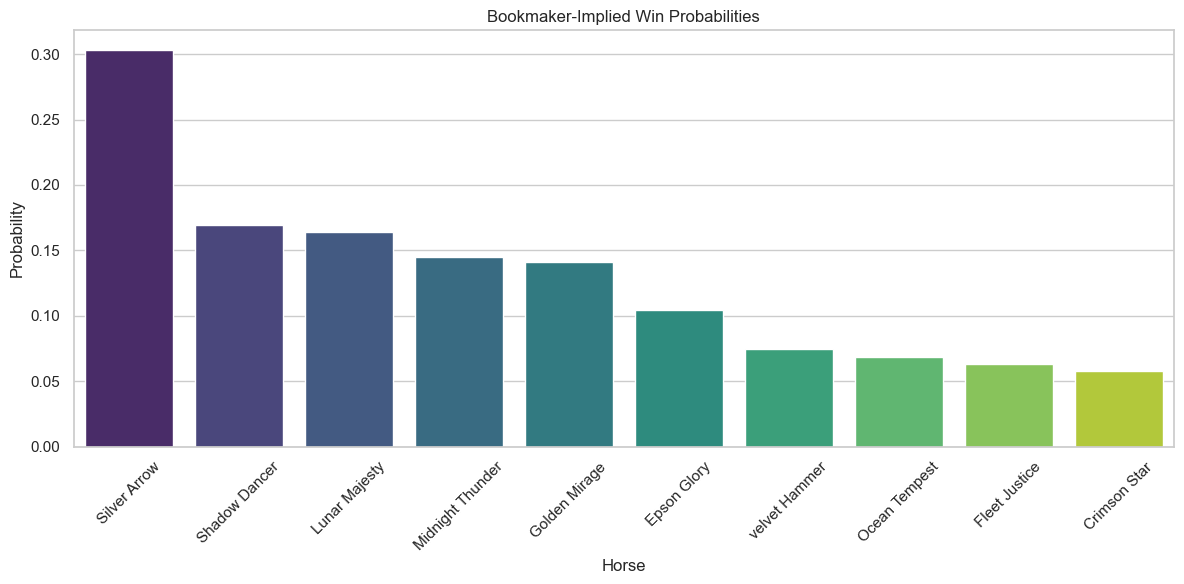

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x="Horse", y="Implied_Prob", hue="Horse", palette="viridis", legend=False)
plt.title("Bookmaker-Implied Win Probabilities")
plt.ylabel("Probability")
plt.xlabel("Horse")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📘 What This Shows
We’ve now visualized how the bookmaker sees the race. Horses with low odds have higher implied chances. This becomes our baseline to compare against when we build our own model later.
